# Background

Today, we are producing more information than ever before, but not all information is true. Some of it is actually malicious and harmful. And it makes it harder for us to trust any piece of information we come across! Not only that, now the bad actors are able to use language modelling tools like Open AI's GPT 2 to generate fake news too. Ever since its initial release, there have been talks on how it can be potentially misused for generating misleading news articles, automating the production of abusive or fake content for social media, and automating the creation of spam and phishing content.

How do we figure out what is true and what is fake? Can we do something about it?

# Dataset

The dataset consists of around 387,000 pieces of texts which has been sourced from various news articles from the web as well as texts generated by Open AI's GPT 2 language model!

The dataset is split into train,val and test such that each of the sets has an equal split of the two classes.



In [26]:
#importing Libraries
import numpy as np
import pandas as pd
from matplotlib.pylab import plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk

In [27]:
df = pd.read_csv('/Users/masayasugimotohomefolder/Desktop/FakeNews_Project_DataSet/train/train.csv')
df.head(10)

,text,label
0,The court granted by a 5-4 vote a request made...,real
1,""" Pennsylvania was a crucial swing state in th...",real
2,The company today is rolling out an update to ...,fake
3,"When it comes to trade policy, Hillary Clinton...",real
4,S. stocks had their worst April start since 19...,real
5,"Journey Energy Inc * Journey Energy, Inc. (NAS...",fake
6,Lights like the lights on the back of Alcatel'...,real
7,Chief Cabinet Secretary Yoshihide Suga said th...,real
8,"(Adds quotes, details) AMSTERDAM, Dec 7 (Reute...",real
9,Feb 24 (Reuters) - Danske Andelskassers Bank A...,real


In [28]:
y = df.label
print(f'Ratio of real and fake news:')
y.value_counts(normalize=True).rename({1: 'real', 0: 'fake'})

Ratio of real and fake news:


label
real    0.710124
fake    0.289876
Name: proportion, dtype: float64

In [29]:
#No Missing Data
df.isnull().sum()

text     0
label    0
dtype: int64

In [30]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import string
from textstat import lexicon_count

def extract_features(df):
    # Tokenize the articles
    df['tokens'] = df['text'].apply(word_tokenize)
    df['sentences'] = df['text'].apply(sent_tokenize)
    
    # Get text length
    df['text_length'] = df['tokens'].apply(len)
    
    # Get average sentence length
    df['avg_sentence_length'] = df['sentences'].apply(lambda x: sum(len(s.split()) for s in x) / len(x))
    
    # Get lexical diversity
    df['lexical_diversity'] = df['tokens'].apply(lambda x: len(set(x)) / len(x) if len(x) > 0 else 0)
    
    # Get non-stopword density
    stop_words = set(stopwords.words('english'))
    df['non_stopword_density'] = df['tokens'].apply(lambda x: len([t for t in x if t not in stop_words]) / len(x) if len(x) > 0 else 0)
    
    # Get punctuation density
    df['punctuation_density'] = df['tokens'].apply(lambda x: len([t for t in x if t in string.punctuation]) / len(x) if len(x) > 0 else 0)

    # Get POS tag densities
    pos_tags = ['CC', 'CD', 'DT', 'EX', 'FW', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NN', 'NNS', 'NNP', 'NNPS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB']
    df['pos_tags'] = df['tokens'].apply(nltk.pos_tag)
    for pos_tag in pos_tags:
        df[f'{pos_tag}_density'] = df['pos_tags'].apply(lambda x: len([t for t, tag in x if tag == pos_tag]) / len(x) if len(x) > 0 else 0)
    
    return df

df = extract_features(df)


In [32]:
df_fake = df[df['label'] == 'fake']
df_legit = df[df['label'] == 'real']

In [33]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.util import ngrams

# Define your stop words
stop_words = set(stopwords.words('english'))

def get_most_common_ngrams(df, column, n, top_n):
    # Tokenize and remove stop words
    df['tokens'] = df[column].apply(lambda x: [w for w in word_tokenize(x.lower()) if w.isalpha() and w not in stop_words])
    
    # Get n-grams
    df['ngrams'] = df['tokens'].apply(lambda x: list(ngrams(x, n)))
    
    # Flatten the list of n-grams and get the frequency of each n-gram
    ngrams_list = [ngram for ngrams in df['ngrams'] for ngram in ngrams]
    ngram_freq = Counter(ngrams_list)
    
    # Get the most common n-grams
    most_common_ngrams = ngram_freq.most_common(top_n)
    
    return most_common_ngrams

# You can then call this function with your dataframe and desired parameters
most_common_bigrams_fake = get_most_common_ngrams(df_fake, 'text', 2, 10)
most_common_bigrams_legit = get_most_common_ngrams(df_legit, 'text', 2, 10)

print("Most common bigrams in fake news:")
for bigram, freq in most_common_bigrams_fake:
    print(f"Bigram: {bigram}, Frequency: {freq}")

print("\nMost common bigrams in legit news:")
for bigram, freq in most_common_bigrams_legit:
    print(f"Bigram: {bigram}, Frequency: {freq}")


/var/folders/g_/04p97v5d5715hswqq2cznbx80000gn/T/ipykernel_6627/573393232.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df[column].apply(lambda x: [w for w in word_tokenize(x.lower()) if w.isalpha() and w not in stop_words])
/var/folders/g_/04p97v5d5715hswqq2cznbx80000gn/T/ipykernel_6627/573393232.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ngrams'] = df['tokens'].apply(lambda x: list(ngrams(x, n)))
/var/folders/g_/04p97v5d5715hswqq2cznbx80000gn/T/ipykernel_6627/573393232.

Most common bigrams in fake news:
Bigram: ('united', 'states'), Frequency: 7642
Bigram: ('said', 'statement'), Frequency: 6178
Bigram: ('new', 'york'), Frequency: 4054
Bigram: ('make', 'sure'), Frequency: 3091
Bigram: ('company', 'said'), Frequency: 2928
Bigram: ('end', 'year'), Frequency: 2748
Bigram: ('first', 'time'), Frequency: 2362
Bigram: ('white', 'house'), Frequency: 2152
Bigram: ('continue', 'work'), Frequency: 1984
Bigram: ('donald', 'trump'), Frequency: 1960

Most common bigrams in legit news:
Bigram: ('per', 'share'), Frequency: 8401
Bigram: ('source', 'text'), Frequency: 7414
Bigram: ('company', 'coverage'), Frequency: 6616
Bigram: ('united', 'states'), Frequency: 6142
Bigram: ('donald', 'trump'), Frequency: 5898
Bigram: ('last', 'year'), Frequency: 4789
Bigram: ('text', 'eikon'), Frequency: 4718
Bigram: ('earnings', 'per'), Frequency: 4652
Bigram: ('eikon', 'company'), Frequency: 4361
Bigram: ('president', 'donald'), Frequency: 4303


## Exploratory Data Analysis

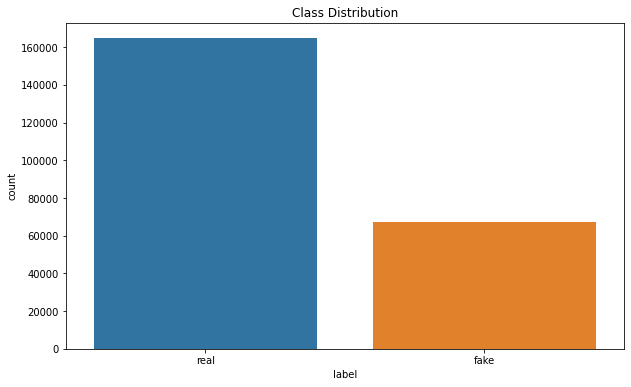

In [54]:
plt.figure(figsize=(10,6))
sns.countplot(x='label', data=df)
plt.title('Class Distribution')
plt.show()


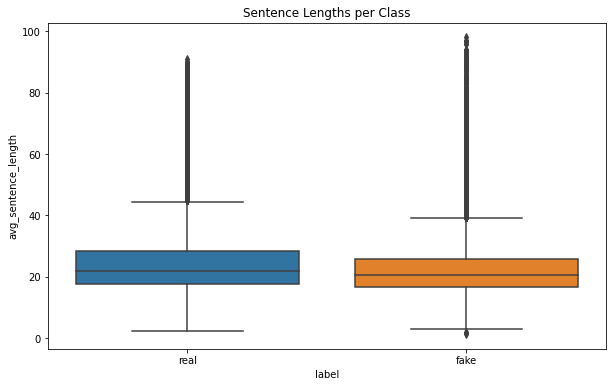

In [58]:
df['avg_sentence_length'] = df['sentences'].apply(lambda x: sum(len(s.split()) for s in x) / len(x))
plt.figure(figsize=(10,6))
sns.boxplot(x='label', y='avg_sentence_length', data=df)
plt.title('Sentence Lengths per Class')
plt.show()


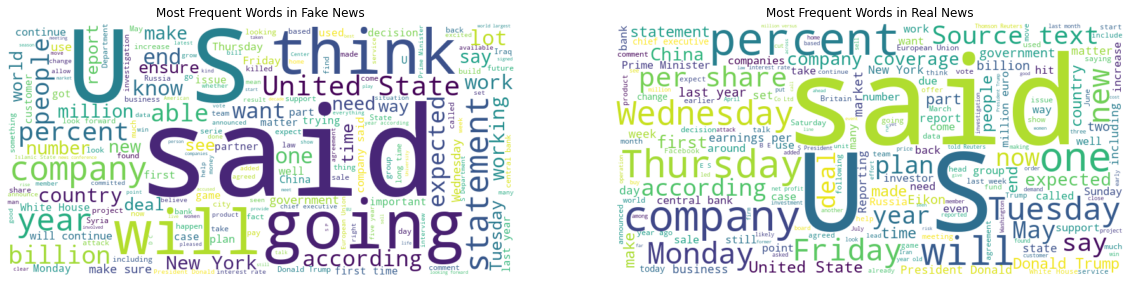

In [60]:
from wordcloud import WordCloud

# Separate text of fake and real news
fake_text = ' '.join(df[df['label']=='fake']['text'])
real_text = ' '.join(df[df['label']=='real']['text'])

# Create word clouds
fake_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fake_text)
real_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(real_text)

# Display the word clouds
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.title('Most Frequent Words in Fake News')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.title('Most Frequent Words in Real News')
plt.axis('off')

plt.show()


## Split the data into training and testing sets

In [49]:
from scipy.sparse import hstack

# Define features to be included
features_to_include = ['text_length', 'avg_sentence_length', 
                       'lexical_diversity', 'non_stopword_density', 'punctuation_density', 
                       'CC_density', 'CD_density', 'DT_density', 'EX_density', 
                       'FW_density', 'IN_density', 'JJ_density', 'JJR_density', 
                       'JJS_density', 'LS_density', 'MD_density', 'NN_density', 
                       'NNS_density', 'NNP_density', 'NNPS_density', 'PDT_density', 
                       'POS_density', 'PRP_density', 'PRP$_density', 'RB_density', 
                       'RBR_density', 'RBS_density', 'RP_density', 'TO_density', 
                       'UH_density', 'VB_density', 'VBD_density', 'VBG_density', 
                       'VBN_density', 'VBP_density', 'VBZ_density', 'WDT_density', 
                       'WP_density', 'WP$_density', 'WRB_density']


vectorizer = TfidfVectorizer(stop_words='english')
X_text = vectorizer.fit_transform(df['text'])
X_other_features = df[features_to_include]
X_all = hstack([X_text, X_other_features])



In [50]:
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size=0.2, random_state=42)


## Apply undersampling to the training data

In [52]:
from imblearn.under_sampling import RandomUnderSampler

# Define the undersampler
rus = RandomUnderSampler(random_state=42)

# Resample the data
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)


## Building Naive Bayes Model

In [53]:
from sklearn.naive_bayes import MultinomialNB

# Train a Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train_resampled, y_train_resampled)

# Make predictions
predictions = nb.predict(X_test)

# Evaluate the model
print("Performance with TF-IDF vectors:")
print(classification_report(y_test, predictions))


Performance with TF-IDF vectors:
              precision    recall  f1-score   support

        fake       0.50      0.83      0.62     13483
        real       0.90      0.66      0.76     32918

    accuracy                           0.71     46401
   macro avg       0.70      0.74      0.69     46401
weighted avg       0.79      0.71      0.72     46401

